In [1]:
from matplotlib.pyplot import cm
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
from scipy import constants as cst
import sys, os, git
import warnings
warnings.filterwarnings("ignore")

In [2]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
path_figures = current_path[len(git_path):] + '/'
path_in_folder = current_path[len(git_path)+1:]

In [3]:
sys.path.append(git_path + "/.submodules/pyplot-perso")
from plttools import PltTools

In [4]:
data_path = git_path + "/.submodules/dataset-LJ-fluid/analysis/"
all_temperatures = np.array([0.8, 1.0, 1.2, 1.5, 1.8, 2.2, 2.6, 3.0]) # unitless
ref_time = 463.7943 # LJ time in fs
ref_temp = 50.3219 # LJ temp in K
sigma = 3 # LJ sigma A
cmap_cool = cm.cool
cmap_dark_blue_to_cyan = LinearSegmentedColormap.from_list('dark_blue_to_cyan', ['#1D11CB', cmap_cool(0.0)])
cmap_dark_blue_to_pink = LinearSegmentedColormap.from_list('dark_blue_to_cyan', ['#1D11CB', cmap_cool(1.0)])
cmap_cyan_to_green_blue = LinearSegmentedColormap.from_list('cyan_to_green_blue',
    ['#00FFFF', '#00FA9A', '#3683e2']  # Cyan → Medium Spring Green → Your Blue Shade
)

In [5]:
t_grivet_08, Gij_Grivet_08 = np.loadtxt("grivet-2005-data/data-G/T0.8.dat").T
t_grivet_08 *= ref_time*1e-3
Gij_Grivet_08 /= sigma**6,
t_grivet_30, Gij_Grivet_30 = np.loadtxt("grivet-2005-data/data-G/T3.0.dat").T
t_grivet_30 *= ref_time*1e-3
Gij_Grivet_30 /= sigma**6,

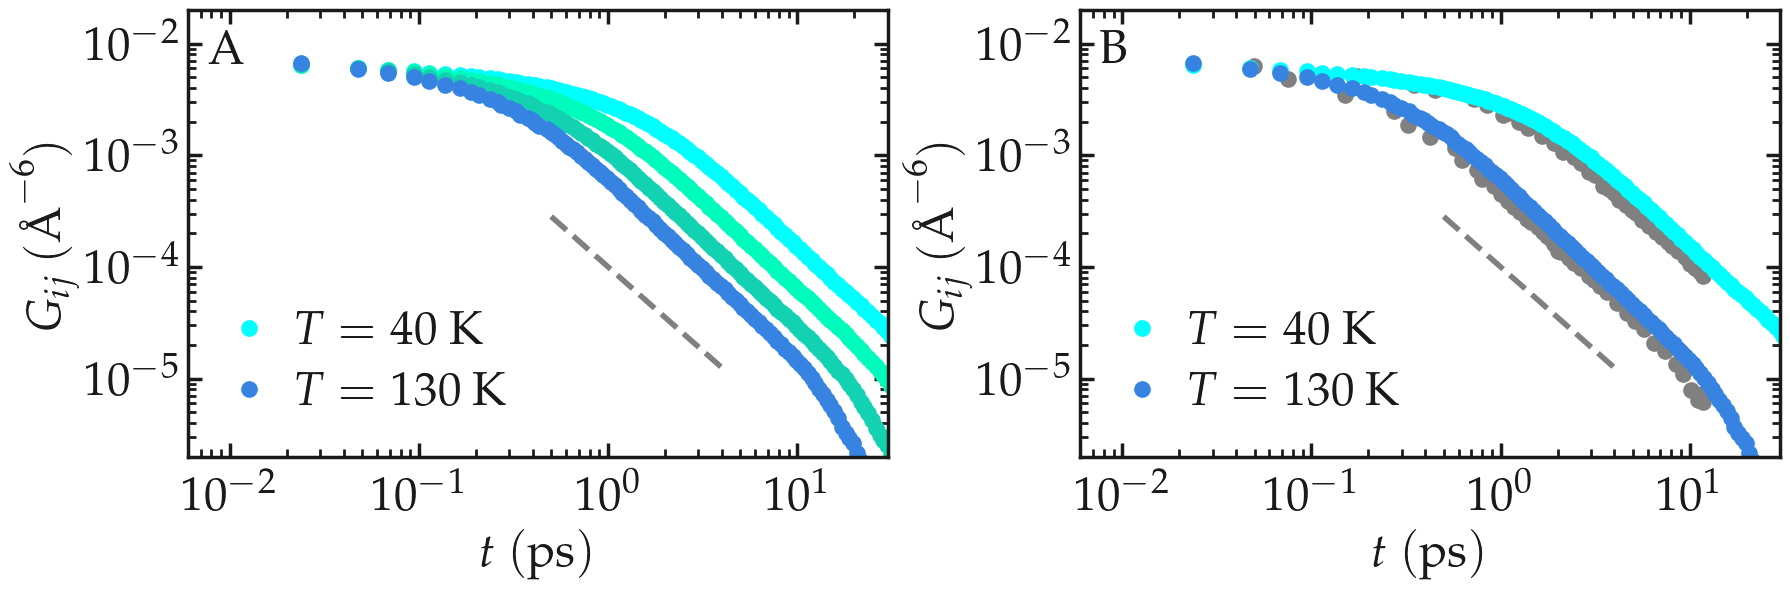

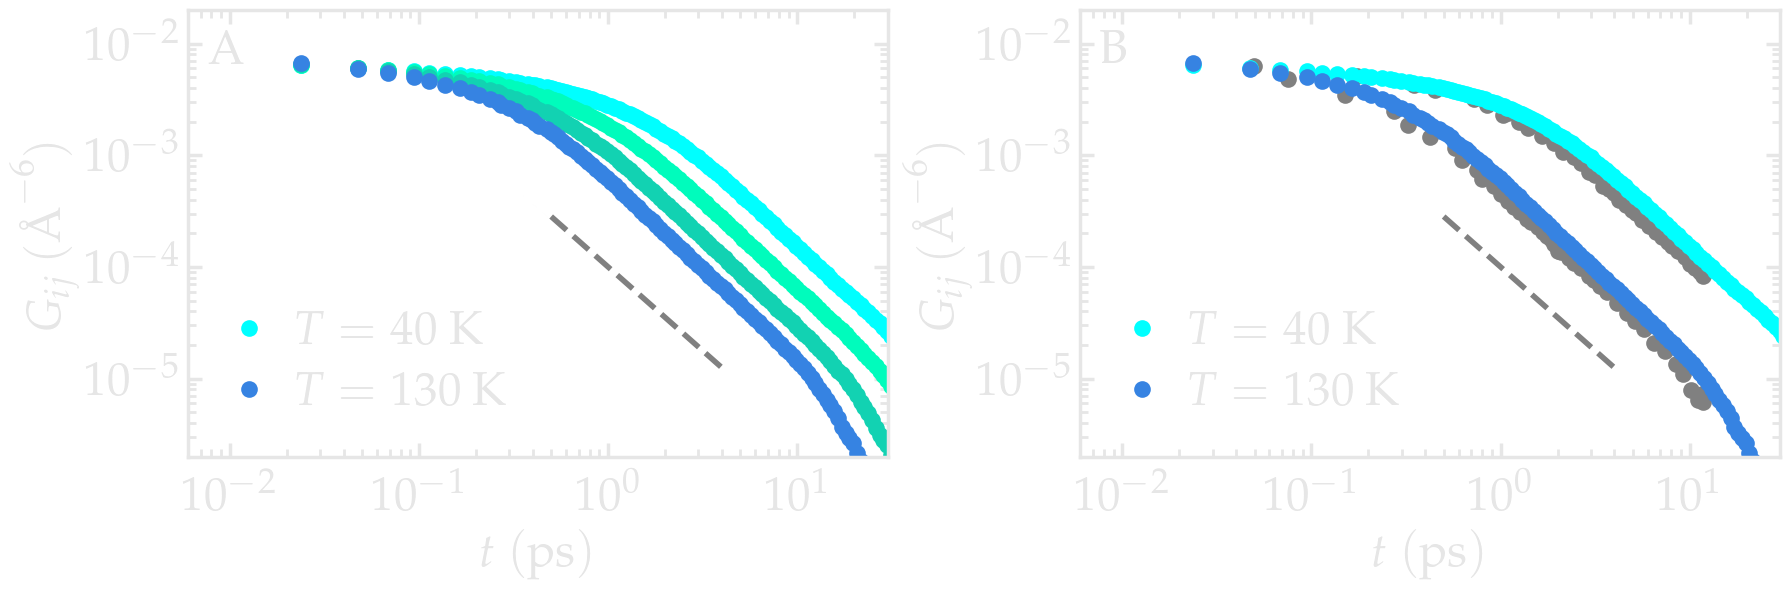

In [20]:
filename = "nmr-correlation-functions"
colors = cmap_cyan_to_green_blue(np.linspace(0, 1, len(all_temperatures)//2))

for dark_mode in [False, True]:

    myplt = PltTools()
    myplt.prepare_figure(fig_size = (18,6), dark_mode = dark_mode,
                         transparency = True, use_serif=True, n_colone = 2)
    # Panel 1
    myplt.add_panel()
    for T, color in zip(all_temperatures[::2], colors):
        t, Gij = np.loadtxt(data_path+f"varying-temperature/T{T}/Gi_vs_f.dat").T
        if ((T == all_temperatures[0]) | (T == all_temperatures[-2])):
            myplt.add_plot(x = t, y = Gij, type = "loglog", linewidth_data = 3,
                        marker = "o", data_color = color[:3], markersize = 12,
                        data_label = f'$T = {np.int32(T*ref_temp)}~\mathrm K$')
        else:
            myplt.add_plot(x = t, y = Gij, type = "loglog", linewidth_data = 3,
                        marker = "o", data_color = color[:3], markersize = 12) 
    x = np.logspace(np.log10(0.5), np.log10(4))
    myplt.add_plot(x = x, y = x**(-3/2)/10000, type = "loglog", linewidth_data = 2,  marker = "--",
                   data_color = np.array([0.5, 0.5, 0.5]))
    myplt.complete_panel(ylabel = r'$G_{ij}~(\mathrm{\AA{}}^{-6})$', xlabel = r'$t~(\mathrm{ps})$',
                         xpad = 15, legend=True, handlelength_legend=1)
    myplt.set_boundaries(x_boundaries=(0.006, 30), y_boundaries=(2e-6, 0.02))
    # Panel 2
    myplt.add_panel()
    myplt.add_plot(x = t_grivet_08, y = Gij_Grivet_08, type = "loglog", linewidth_data = 3,
            marker = "o", data_color = np.array([0.5, 0.5, 0.5]), markersize = 12)
    myplt.add_plot(x = t_grivet_30, y = Gij_Grivet_30, type = "loglog", linewidth_data = 3,
            marker = "o", data_color = np.array([0.5, 0.5, 0.5]), markersize = 12)
    for T, color in zip(all_temperatures[::2], colors):
        t, Gij = np.loadtxt(data_path+f"varying-temperature/T{T}/Gi_vs_f.dat").T
        if ((T == all_temperatures[0]) | (T == all_temperatures[-2])):
            myplt.add_plot(x = t, y = Gij, type = "loglog", linewidth_data = 3,
                        marker = "o", data_color = color[:3], markersize = 12,
                        data_label = f'$T = {np.int32(T*ref_temp)}~\mathrm K$')
    x = np.logspace(np.log10(0.5), np.log10(4))
    myplt.add_plot(x = x, y = x**(-3/2)/10000, type = "loglog", linewidth_data = 2,  marker = "--",
                   data_color = np.array([0.5, 0.5, 0.5]))
    myplt.complete_panel(ylabel = r'$G_{ij}~(\mathrm{\AA{}}^{-6})$', xlabel = r'$t~(\mathrm{ps})$',
                         xpad = 15, legend=True, handlelength_legend=1)
    myplt.set_boundaries(x_boundaries=(0.006, 30), y_boundaries=(2e-6, 0.02))
    myplt.add_subplotlabels(type_label_panel = "A")
    myplt.save_figure(filename = filename, saving_path = git_path+path_figures)